In [1]:
import numpy as np

In [2]:
np.version.full_version

'1.11.3'

In [3]:
a = np.array([0, 1, 2, 3, 4, 5])
print a         # 1D array with 6 elements
print a.ndim    # (row, cols)
print a.shape

[0 1 2 3 4 5]
1
(6,)


In [4]:
b = a.reshape(3, 2)
print b
print b.ndim
print b.shape

b[1][0] = 77
print b
print a      # b is not a copy

[[0 1]
 [2 3]
 [4 5]]
2
(3, 2)
[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]


In [5]:
# for true copy
c = a.reshape(3, 2).copy()
print c

c[0][0] = -99
print c       # c is a truly independent obect
print a

[[ 0  1]
 [77  3]
 [ 4  5]]
[[-99   1]
 [ 77   3]
 [  4   5]]
[ 0  1 77  3  4  5]


In [6]:
# operations are propagated to the individual elements
d = np.array([1, 2, 3, 4, 5])
print d * 2
print d ** 2
print d > 3

[ 2  4  6  8 10]
[ 1  4  9 16 25]
[False False False  True  True]


In [11]:
# indexing

b = a.copy()
print a
print b


# 1. using positional index
print a[1]

# 2. using a np.array
print a[np.array([2, 3, 4])]

# 3. using the boolean values
print a > 4
a[a > 4] = 4 # set all numbers greater than 4 to 4 :)
print a
a.clip(0, 4) # handy method for doing the above
b.clip(1, 5)

[0 1 4 3 4 4]
[0 1 4 3 4 4]
1
[4 3 4]
[False False False False False False]
[0 1 4 3 4 4]


array([1, 1, 4, 3, 4, 4])

In [16]:
# handling non-existing values

missing_data = np.array([1, 2, np.NAN, 3, 4]) # sample data with an invalid value

print missing_data
print np.isnan(missing_data)
print missing_data[~np.isnan(missing_data)] # remove all invalid data
print np.mean(missing_data[~np.isnan(missing_data)])

[  1.   2.  nan   3.   4.]
[False False  True False False]
[ 1.  2.  3.  4.]
2.5


#### ML starter

In [44]:
import scipy as sp
import matplotlib.pyplot as plt

/Users/gabrieli/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [20]:
data = sp.genfromtxt?

In [21]:
data = sp.genfromtxt('./resources/ch01/data/web_traffic.tsv', delimiter='\t')

In [25]:
print data[:10]
print data.shape

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [38]:
# preprocessing

hrs = data[:,0]
hits = data[:,1]

In [41]:
# how many values in hits have invalid values, NaN?
print sp.sum(sp.isnan(hits))

8


In [43]:
# remove rows with invalid values
hrs = hrs[~sp.isnan(hits)]
hits = hits[~sp.isnan(hits)]

print hrs.shape
print hits.shape

(735,)
(735,)


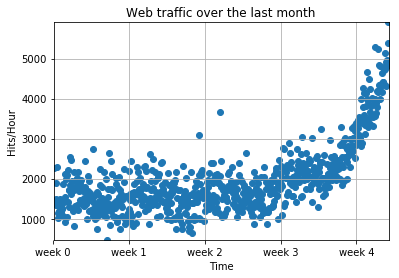

In [49]:
# plotting

plt.scatter(hrs, hits)
plt.title('Web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

# in the first weeks the traffic stayed more or less the same, but sharply increased in the last week.

In [50]:
# finding the right model and learning algorithm

# approximation error
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

# minimize approximation error for a good model

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]
317389767.34


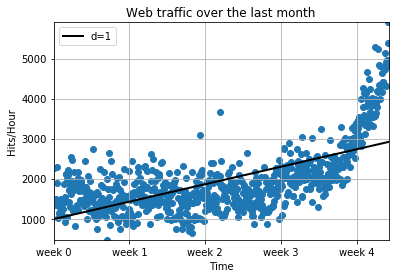

In [75]:
# fit a polynomial of degree 1
fp1, residuals, rank, sv, rcond = sp.polyfit(hrs, hits, 1, full=True)
print "Model parameters: %s" % fp1
print residuals

# Line of fit: f(hits) = 2.59619213 * hrs + 989.02487106

# create a model function
f1 = sp.poly1d(fp1)
print error(f1, hrs, hits)

# plotting
plt.scatter(hrs, hits)
plt.title('Web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

fx = sp.linspace(0, hrs[-1], 1000) # generate x-values for plotting
plt.plot(fx, f1(fx), 'k',linewidth=2)
plt.legend(['d=%i' % f1.order], loc='upper left')
plt.show()

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
179983507.878


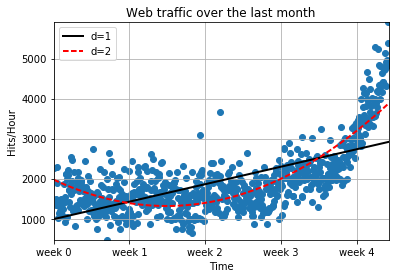

In [78]:
# fit a polynomial of degree 2
f2p = sp.polyfit(hrs, hits, 2)
print f2p

# Line of fit: f(hits) = 0.0105322215 * hrs**2 - 5.26545650 * hrs + 1974.76082

# create a model function
f2 = sp.poly1d(f2p)
print error(f2, hrs, hits)

# plotting (superimpose)
plt.scatter(hrs, hits)
plt.title('Web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

fx = sp.linspace(0, hrs[-1], 1000) # generate x-values for plotting
plt.plot(fx, f1(fx), 'k', linewidth=2)
plt.plot(fx, f2(fx), 'r', linewidth=2, linestyle='dashed')
plt.legend(['d=%i' % f1.order, 'd=%i' % f2.order], loc='upper left')
plt.show()

# error is lower, however it is a more complex function

Error: d=1 317389767.33978
Error: d=2 179983507.87818
Error: d=3 139350144.03173
Error: d=10 121942326.36353
Error: d=100 109452402.92261


/Users/gabrieli/anaconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


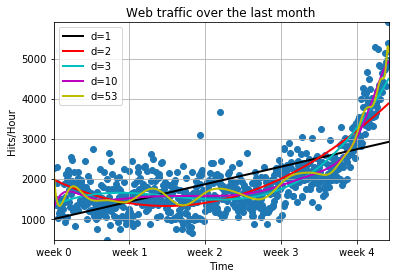

In [95]:
# increasing to higher degrees: [1, 2, 3, 10, 100]

degrees = [1, 2, 3, 10, 100]
color = ['k', 'r', 'c', 'm', 'y']
models = []

for degree in degrees:
    f = sp.polyfit(hrs, hits, degree)
    m = sp.poly1d(f)
    models.append(m)
    print 'Error: d=%s %.5f' % (degree, error(m, hrs, hits))
    
plt.scatter(hrs, hits)
plt.title('Web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hits/Hour')
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

fx = sp.linspace(0, hrs[-1], 1000) # generate x-values for plotting
for i in zip(models, color):
    # print i
    plt.plot(fx, i[0](fx), i[1], linewidth=2)
plt.legend(['d=%i' % m.order for m in models], loc='upper left')
plt.show()

# check why 53?
# models with d=10, 100 have close fit to data; capturing the underlying process plus the noise - overfitting